# Actividad 1. Captura de datos con patrones clásicos
    Octubre 2024. Mastodon API


## 1. Objetivo
El objetivo de esta actividad es trabajar con los patrones de captura de datos que se han visto en la parte de teoria. Por conveniencia vamos a trabajar estos patrones en un entorno real, Mastodon, mediante su API. Hay dos razones principales que nos motivan a realizar la actividad en este entorno:

* El acceso a datos reales en streaming ofrece la oportunidad de entender las problemáticas que os vais a encontrar en el día a día de vuestro futuro trabajo.
* Trabajar sobre dos metodologías de acceso que responden a los patrones request/response, al trabajo con ventanas temporales y las agregaciones en tiempo real.

Así, alineados a estas razones están los objetivos de este ejercicio:

* Empezar a trabajar en la captura de datos reales
* Entender como se trabaja sin la ayuda de tecnología específica Big Data
* Practicar los patrones de captura estudiados

# 2. Captura de información en streaming

## 2.1. Introducción
En esta práctica vais a tener que realizar una serie de actividades que, de manera incremental, van a enseñaros unas metodologías y herramientas con el objetivo de construir una infraestructura para la recopilación y análisis del stream de la red social de Mastodon en tiempo real.

[Mastodon](https://joinmastodon.org/) es un software libre desarrollado para desplegar una red social robusta y descentralizada (con una gran semejanza a Twitter), siendo lanzada junto con su dominio principal [mastodon.social](https://mastodon.social/explore) en octubre de 2016. La principal diferencia con Twitter reside en que hay diversos servidores de Mastodon, y que podemos crear el nuestro propio. Entre ellos pueden trabajar de una manera federada.

Pero antes de capturar datos, debemos crear una cuenta en https://mastodon.social/. Está cuenta nos permitirá generar las credenciales  para poder acceder a los endpoints de la citada API.

Para que haya contenidos es importante que sigais a usuarios que a su vez tengas seguidores, como usuarios que tengan miles de seguidores, periódicos, etc.... Aquí os dejo dos usuarios a los que podéis seguir, aunque es recomendable que añadais algunos más:

@Gargron@mastodon.social

@el_pais@mastodon.social

Una vez logueados, en la opción <strong>Preferences->Development</strong> se accede al menú de desarrollador y en este menú se debe registrar una aplicación que tendrá unas credenciales asociadas y que se necesitarán a lo largo de las actividades siguientes.


## 2.2 Registro de la aplicación

Antes de poder utilizar la API de Mastodon, debéis registrar vuestra aplicación, lo que le proporciona una "Client key", un "Client secret" y un "Access token"  Podéis crear una cuenta en un servidor propio de [Mastodon.social](https://mastodon.social). Sin embargo, si lo preferéis podéis utilizar otro servidor de Mastodon, como por ejemplo el dominio principal de mastodon.social.


En la Figura 1 y 2 se muestra como crear una aplicación asociada a vuestra cuenta en el apartado de Preferences y en la opción Development.
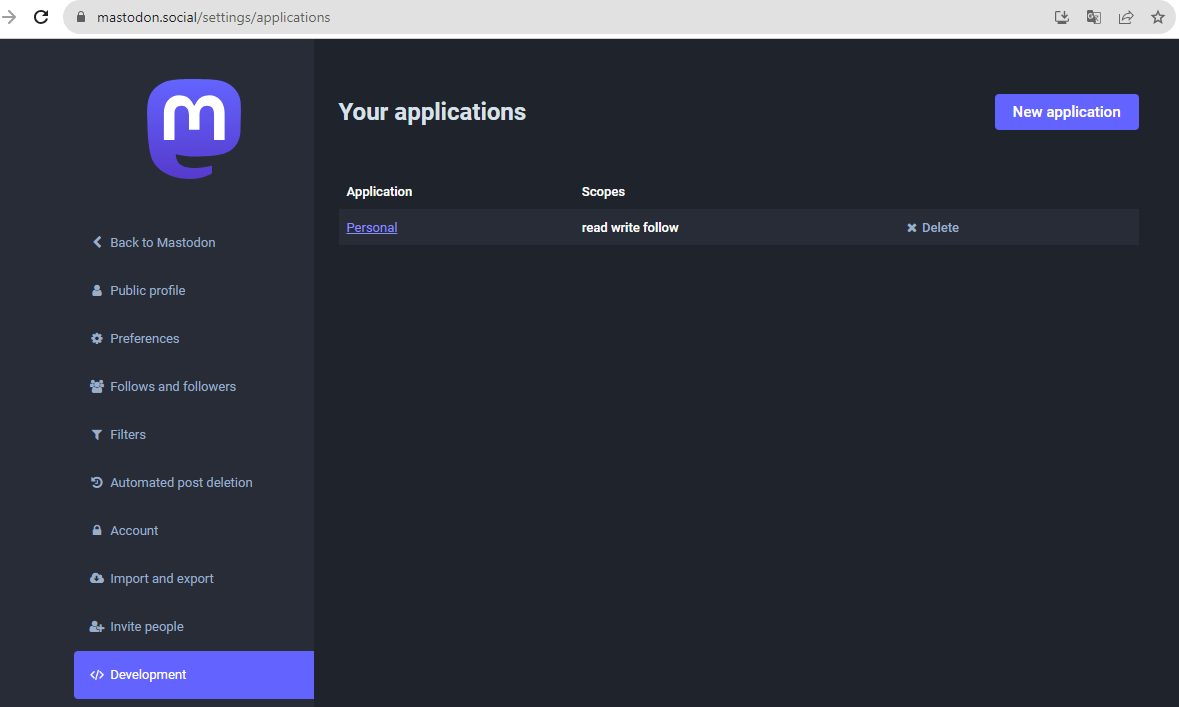
Figura 1 Creación de una aplicación en Mastodon

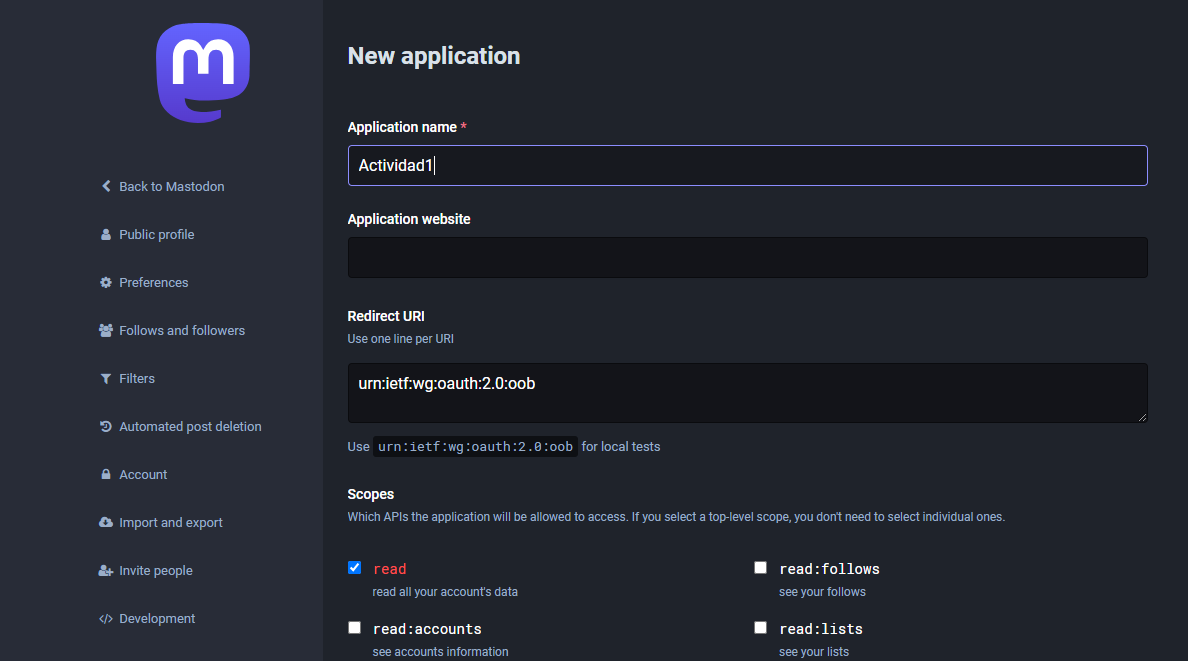

Figura 2. Nombre de la aplicación y configuración

En la configuración de la aplicación se pueden dejar las opciones por defecto y confirmar pulsando el botón "Submit"



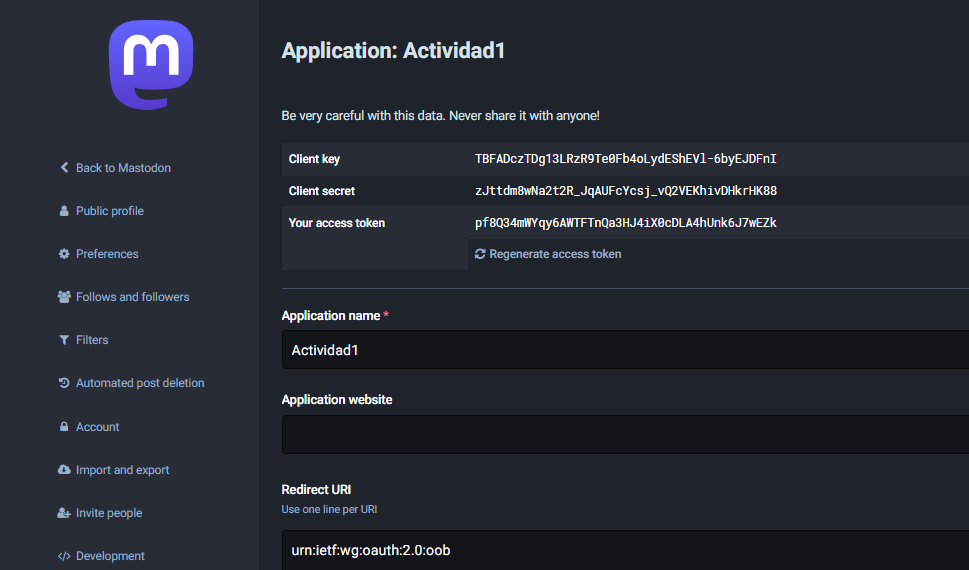
Figura 3. Consulta de las credenciales de acceso a la aplicación

Después será necesario entrar en la aplicación para comprobar las credenciales de acceso que se deberán utilizar para poderse conectar a la API. En concreto para esta actividad la conexión se realizará utilizando el "access_token", que deberéis copiar y pegar en la celda de conexión a la API.

## Librería mastodon.py

En esta actividad vamos a hacer las llamadas a la API utilizando la librería mastodon.py (https://mastodonpy.readthedocs.io/en/1.5.0/), que nos proporcionará los métodos necesarios para facilitar la conexión a la API de mastodon.

## Consulta a la API de Mastodon y recuperación de toots

Una vez conseguido el token ya podemos realizar consultas de la API de Mastodon utilizando los métodos de la librería . 

En el siguiente ejemplo, de manera introductoria, vamos a consultar 2 Toots de vuestro "timeline". Recuerda que como se comentó antes, para que haya información es importante que sigais a usuarios que tengan bastantes seguidores, ya que si no vuestro "timeline" estará vacío. 

Se pide revisar, configurar y ejecutar el siguiente ejemplo, en el que debéis reemplazar \<FILL_IN\> por el valor correspondiente, en este caso por el access_token de vuestra aplicación

In [1]:
from mastodon import Mastodon
import json
import pprint

access_token='4OfGQc33170QV9Zizw-RLzcinAH2bmE855GIMoQpxXU'

url= 'https://mastodon.social'

api = Mastodon(access_token=access_token,api_base_url=url)

#consulta del timeline del usuario, limitado a 2
resultado = api.timeline(limit=2)

# printamos de manera formateada el elementos  obtenido
p = pprint.PrettyPrinter(depth=4)

p.pprint(resultado)

[{'account': {'acct': 'Gargron',
              'avatar': 'https://files.mastodon.social/accounts/avatars/000/000/001/original/a0a49d80c3de5f75.png',
              'avatar_static': 'https://files.mastodon.social/accounts/avatars/000/000/001/original/a0a49d80c3de5f75.png',
              'bot': False,
              'created_at': datetime.datetime(2016, 3, 16, 0, 0, tzinfo=tzutc()),
              'discoverable': True,
              'display_name': 'Eugen Rochko',
              'emojis': [],
              'fields': [{...}, {...}, {...}],
              'followers_count': 352732,
              'following_count': 552,
              'group': False,
              'header': 'https://files.mastodon.social/accounts/headers/000/000/001/original/d13e4417706a5fec.jpg',
              'header_static': 'https://files.mastodon.social/accounts/headers/000/000/001/original/d13e4417706a5fec.jpg',
              'hide_collections': False,
              'id': 1,
              'indexable': True,
              'l

## Estructura JSON de la respuesta
Al ingerir datos de Mastodon, el objeto principal es el objeto [Toot](https://mastodonpy.readthedocs.io/en/1.5.0/index.html?highlight=Toot#toot-dicts), que es un objeto en formato JSON con varios objetos secundarios (anidados).La respuesta que se obtiene en formato JSON se puede interpretar para acceder a la información. De esta forma podéis observar que se trabaja con estructuras de datos de Python, como pueden ser listas y diccionarios. La lista se compone de diccionarios con metadatos de cada "toot". 
El diccionario principal se compone de un montón de claves: "created_at", "id" y "account", entre otras. A su vez, consultando estas claves, puedo obtener otros diccionarios, listas, texto, enteros, etc...
Para poder recuperar la información es necesario conocer el funcionamiento de listas y diccionarios en Python.

In [2]:
primer_elemento=resultado[0]
print ("Claves principales:", primer_elemento.keys(),"\n")
print (" 1.->",primer_elemento["created_at"],"\n")
print (" 2.->",primer_elemento["id"],"\n")
print (" 3.->",primer_elemento["account"],"\n")

Claves principales: dict_keys(['mentions', 'url', 'uri', 'account', 'tags', 'media_attachments', 'sensitive', 'in_reply_to_account_id', 'reblog', 'in_reply_to_id', 'reblogs_count', 'favourited', 'filtered', 'edited_at', 'reblogged', 'application', 'spoiler_text', 'bookmarked', 'replies_count', 'muted', 'emojis', 'poll', 'language', 'id', 'visibility', 'content', 'card', 'favourites_count', 'created_at']) 

 1.-> 2024-10-27 07:10:30.217000+00:00 

 2.-> 113378133947823730 

 3.-> {'url': 'https://mastodon.social/@Gargron', 'uri': 'https://mastodon.social/users/Gargron', 'username': 'Gargron', 'id': 1, 'statuses_count': 77497, 'created_at': datetime.datetime(2016, 3, 16, 0, 0, tzinfo=tzutc()), 'display_name': 'Eugen Rochko', 'avatar_static': 'https://files.mastodon.social/accounts/avatars/000/000/001/original/a0a49d80c3de5f75.png', 'note': '<p>Founder of <span class="h-card" translate="no"><a href="https://mastodon.social/@Mastodon" class="u-url mention">@<span>Mastodon</span></a></span>

## Uso de la biblioteca Pandas para analizar toots
Pandas es una biblioteca de Python que ofrece una interfaz de alto nivel para  análisis de datos. Teneis información detallada en http://pandas.pydata.org/pandas-docs/stable/. Para ver su uso con la API de Mastodon vamos a mirar la distribución temporal de los últimos toots 

### Estructuras de datos básicos: Serie y Dataframe

Pandas provee de varias estructuras de datos: la serie y el dataframe son las más importantes.  Una **serie** es un vector unidimensional con etiquetas en los ejes y datos homogeneos. Un **dataframe** es una tabla bidimensional con etiquetas en los ejes y datos potencialmente heterogéneos. El dataframe es la estructura principal de trabajo con la biblioteca Pandas, muy parecida a una tabla de datos.


### Ejemplos que muestra como crear un dataframe de Pandas a partir del Json

En este ejemplo se va a crear un dataframe de Pandas a partir del resultado de la consulta a la API de Mastodon. Los valores que nos interesen los convertiremos en columnas del dataframe

In [3]:
import pandas as pd
import numpy as np

api = Mastodon(access_token=access_token,api_base_url=url)

#consulta del timeline del usuario, limitado a 2
resultado = api.timeline(limit=2)

datos=[]

for dato in resultado:
    datos.append({'created_at':dato['created_at'],                  
                  'favourite_count':dato['favourites_count'],
                 'content':dato['content']})
    
#A partir de la lista de diccionarios se crea un dataframe de Pandas y se muestra por pantalla            

df = pd.DataFrame(datos) 

display(df)


,content,created_at,favourite_count
0,<p>¿El futuro se tiene que parecer al futuro?<...,2024-10-27 07:50:08+00:00,0
1,,2024-10-27 07:10:30.217000+00:00,0


En el siguiente ejemplo se puede ver como crear un dataframe a partir de una búsqueda por una palabra determinada utilizando el método [*.search*](https://mastodonpy.readthedocs.io/en/1.5.0/index.html?highlight=search#search-result-dicts) de la API de Mastodon. Recordad que consultar información sobre la API en la documentación: https://mastodonpy.readthedocs.io/en/1.5.0/

In [7]:
api = Mastodon(access_token=access_token,api_base_url=url)
resultado = api.search("Trump",result_type="statuses")

datos=[]
for dato in resultado['statuses']:
    datos.append({'created_at':dato['created_at'],                  
                  'favourites_count':dato['favourites_count'],
                  'content':dato['content']})
#A partir de la lista de diccionarios se crea un dataframe de Pandas y se muestra por pantalla            

df = pd.DataFrame(datos) 

display(df)

,content,created_at,favourites_count
0,<p>Chinesische Hacker zielten Berichten zufolg...,2024-10-27 08:21:18+00:00,0
1,"<p>Do it, Lady Liberty! Thump the Trump!</p><p...",2024-10-27 08:34:07.292000+00:00,0
2,<p>Russians Behind Fake Video Showing Trump Ba...,2024-10-27 08:32:33.791000+00:00,0
3,<p>Downfall Of Democracy -- Part Two</p><p><a ...,2024-10-27 08:32:32.995000+00:00,0
4,<p>Stalin justified the murder of millions wit...,2024-10-27 08:32:00.439000+00:00,0
5,<p>Jamie Dimon and Bill Gates won’t publicly c...,2024-10-27 08:09:00+00:00,0
6,"<p>Scary costume indeed...</p><p><a href=""http...",2024-10-27 08:31:02.218000+00:00,1
7,<p>I believe Trump WOULD do things like this.<...,2024-10-27 08:30:01.323000+00:00,0
8,<p>Again -- ewwww!!! Such sick-minded men.</p>...,2024-10-27 08:28:54.587000+00:00,0
9,<p>Elon Musk und Donald Trump: Wie groß ist se...,2024-10-24 19:10:38+00:00,0


### Ejemplo 1.

Muestra los 5 toots más populares con el hashtag "war", mostrando id y 50 caracteres del contenido

In [5]:
# Busqueda por hashtag
hashtag = 'war'

resultados = api.timeline_hashtag(hashtag, limit=5)

p = pprint.PrettyPrinter(depth=4)

# iteración sobre los toots
    
lista_usuarios= set()
for toot in resultados:
    autor=toot['account']['acct'] 
    id_autor= toot['account']['id']
    #almacena cada usuario como una tupla de autor e id del autor
    lista_usuarios.add((autor, id_autor ))
    #Muestra parte del contenido (25 caracteres) y autor de cada "toot"
    print( "Toot: ",toot['content'][:25],'... Autor: ', autor)
    

Toot:  <p>Russian Offensive Camp ... Autor:  byteseu@pubeurope.com
Toot:  <p><a href="https://www.e ... Autor:  europesays@pubeurope.com
Toot:  <p><a href="https://masto ... Autor:  Gerd_Brodowski
Toot:  <p>It doesn&#39;t matter  ... Autor:  schizanon
Toot:  <p>South Korea’s Yoon, Po ... Autor:  byteseu@pubeurope.com


### Ejercicio 1.

Muestra los 10 toots más recientes con el hashtag Ukraine, mostrando solamente fecha, id del autor y texto . Addicionalmente, añade al **set** *lista_usuarios*, una tupla con el nombre del autor y su id para cada *toot*. Solo debéis reemplazar los campos con \<FILL_IN\> por el código necesario.

In [8]:
hashtag = "Ukraine"
resultados = api.timeline_hashtag(hashtag)
lista_usuarios= set()
for toot in resultados:
    autor=toot['account']['acct']
    id_autor= toot['account']['id']
    #almacena cada usuario como una tupla de autor e id del autor
    lista_usuarios.add((autor, id_autor))
    print("Fecha: ",toot['created_at'] ,"Toot: ",toot['content'][:25],'... Autor: ', autor)

Fecha:  2024-10-27 08:10:58+00:00 Toot:  Psychologen der Uniklinik ... Autor:  rbrs@anonsys.net
Fecha:  2024-10-27 08:40:10+00:00 Toot:  <p>📰 Zelensky’s Victory P ... Autor:  ukraine@masto.ai
Fecha:  2024-10-27 08:37:51.153000+00:00 Toot:  <p>”The world can stop th ... Autor:  phanecak
Fecha:  2024-10-27 08:37:18+00:00 Toot:  <p>📰 General Staff shares ... Autor:  ukraine@masto.ai
Fecha:  2024-10-27 08:36:00+00:00 Toot:  <p>Ukraine's Zelenskyy sa ... Autor:  raymondpert@mastodon.cloud
Fecha:  2024-10-27 08:33:48+00:00 Toot:  <p>📰 House and cars damag ... Autor:  ukraine@masto.ai
Fecha:  2024-10-27 08:31:09+00:00 Toot:  <p>росія обстріляла три р ... Autor:  rogue_corq@mas.corq.co
Fecha:  2024-10-27 08:30:19.983000+00:00 Toot:  Svidomy: Samsung Galaxy S ... Autor:  uatube@social.net.ua
Fecha:  2024-10-27 08:28:25+00:00 Toot:  <p>KYIV INDEPENDENT: <br> ... Autor:  ukrdef@mstdn.social
Fecha:  2024-10-27 08:28:09+00:00 Toot:  <p>I'm increasingly worri ... Autor:  dimsimple@chinwag.org
Fecha:

### Ejemplo 2 

Muestra el numero total de toots de los usuarios que han hecho los toots consultados en el ejemplo anterior (lista_usuarios). 

En este ejemplo podemos acceder a los toots de un usuario mediante su id. Para ellos creamos una función que retorna información del usuario de Mastodon como el número de toots del usuario.

In [10]:
dict_toots={}

def toots_usuario(id):    
    cuenta=api.account(id)
    toots_usuario=cuenta["statuses_count"]
    return toots_usuario

for usuario in lista_usuarios:
    #usuario es una tupla formada por el nombre del usuario y su identificador
    n_toots=toots_usuario(usuario[1])
    t_usuario = {usuario[0]:n_toots}
    dict_toots.update(t_usuario)
    print(usuario[0],":",n_toots, "toots")


ukraine@masto.ai : 31666 toots
AlbertBorneo@framapiaf.org : 13302 toots
ukrdef@mstdn.social : 3351 toots
byteseu@pubeurope.com : 52263 toots
phanecak : 10190 toots
rogue_corq@mas.corq.co : 6384 toots
rbrs@anonsys.net : 2223 toots
dimsimple@chinwag.org : 4011 toots
raymondpert@mastodon.cloud : 283 toots
josefulehla@mastodon.pirati.cz : 554 toots
ntv@anonsys.net : 726 toots
uatube@social.net.ua : 14979 toots


### Ejercicio 2.

En este caso, a partir del ejemplo anterior, se debe mostrar el nombre, el identificador y el número de seguidores para la lista de usuarios.



In [20]:
def followers_usuario(id):    
    cuenta=api.account(id)
    followers_usuario= cuenta["followers_count"]
    return followers_usuario

for usuario in lista_usuarios:
    #usuario es una tupla formada por el nombre del usuario y su identificador
    n_followers = followers_usuario(usuario[1])
    print("usuario: " + str(usuario[0]) +", identificador: "+ str(usuario[1]) + ", número de followers: " + str(n_followers))


usuario: ukraine@masto.ai, identificador: 111110308874500632, número de followers: 406
usuario: AlbertBorneo@framapiaf.org, identificador: 1352998, número de followers: 302
usuario: ukrdef@mstdn.social, identificador: 112823531176896859, número de followers: 166
usuario: byteseu@pubeurope.com, identificador: 112202788016843605, número de followers: 396
usuario: phanecak, identificador: 109251235973268697, número de followers: 382
usuario: rogue_corq@mas.corq.co, identificador: 111542027562926542, número de followers: 439
usuario: rbrs@anonsys.net, identificador: 112728676570638449, número de followers: 24
usuario: dimsimple@chinwag.org, identificador: 109130429998006351, número de followers: 92
usuario: raymondpert@mastodon.cloud, identificador: 112121405471809165, número de followers: 2376
usuario: josefulehla@mastodon.pirati.cz, identificador: 109291950407900892, número de followers: 327
usuario: ntv@anonsys.net, identificador: 111200287121234070, número de followers: 170
usuario: ua

### Ejemplo 3. 

Realiza un gráfico mostrando dichos usuarios y el número de toots.

A este objetivo vamos a utilizar la biblioteca matplotlib (https://matplotlib.org) para mostrar mediante un gráfico de barras los usuarios y sus toots. Esencialmente se trata de utilizar el método bar pasando el numero de barras y la lista con los valores de los toots. Posteriorment con xticks etiquetamos el eje de las abscisas.

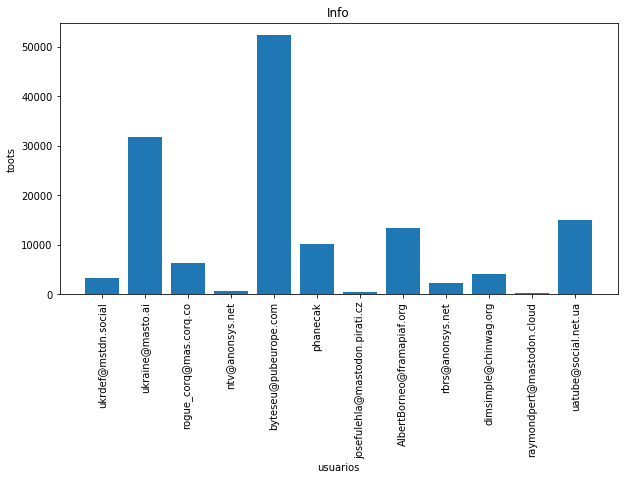

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(range(len(dict_toots)), list(dict_toots.values()), align='center')
plt.xticks(range(len(dict_toots)), list(dict_toots.keys()), rotation='vertical')
plt.title('Info')
plt.xlabel('usuarios')
plt.ylabel('toots')
plt.plot()
plt.show()

### Ejercicio 3. 

Apoyandote en el ejemplo anterior realiza una serie temporal de los últimos 15 toots  con el hashtag ukraine. Solo hay que reemplazar los \<FILL_IN\> para consultar los ultimos 15 toots y entender como hacer el groupby en el dataframe resultante.
El resultado debe ser parecido al siguiente gráfico:

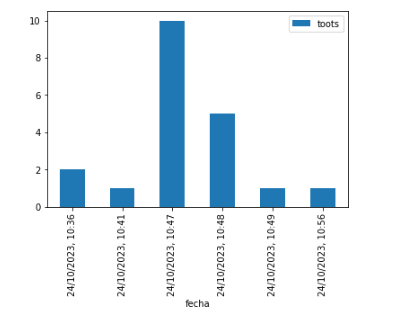

,fecha,toots
0,"27/10/2024, 09:10",1
1,"27/10/2024, 09:11",1
2,"27/10/2024, 09:14",1
3,"27/10/2024, 09:15",2
4,"27/10/2024, 09:16",2
5,"27/10/2024, 09:20",1
6,"27/10/2024, 09:22",1
7,"27/10/2024, 09:25",1
8,"27/10/2024, 09:30",1
9,"27/10/2024, 09:33",1


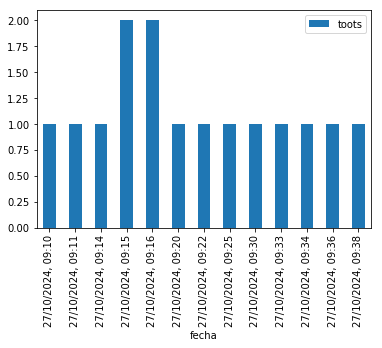

In [24]:
from matplotlib import pyplot
import pandas as pd
from datetime import date
from datetime import timedelta

hashtag = "Ukraine"

resultado = api.timeline_hashtag(hashtag, limit = 15)
lista_usuarios= set()

datos=[]
for toot in resultado:
    datos.append({'fecha':toot['created_at'].strftime("%d/%m/%Y, %H:%M"),
                  'toots':1,
                 })
    
#A partir de la lista de diccionarios se crea un dataframe de Pandas y se muestra por pantalla            

df = pd.DataFrame(datos) 

g = df.groupby("fecha", as_index=False).sum()
display(g)
pl = g.plot(kind="bar",x = "fecha")
pyplot.show()

### Ejemplo 4. 

A partir de este ejemplo vamos a empezar a trabajar (capturar y procesar) con los datos en streaming. Hasta ahora nos hemos familiarizado con las peticiones request/response en Mastodon, pero no hemos realizado ninguna captura continua de los datos. 

El siguiente ejemplo realiza una captura de datos en streaming de los toots más recientes que van apareciendo con  hashtag "war" cada 5 segundos aplicando el patron petición/respuesta y los escribe por pantalla. Si el criterio de busqueda no genera demasiados mensajes nuevos se repetirán los mismos mensajes.

In [25]:
import time

contador=0
while(True):
    resultado = api.timeline_hashtag("war",limit=5)
    for toot in resultado:
        print(toot['created_at'],toot['content'][:40],"\t",toot['account']['acct'])
    contador+=1
    if contador ==4: # limita a 4 las peticiones
        break
    print()
    time.sleep(5) #se espera 5 segundos entre cada consulta    
print("Fin de la consulta")

2024-10-27 09:10:53+00:00 <p><a href="https://fosstodon.org/tags/U 	 nafnlaus@fosstodon.org
2024-10-27 08:58:23+00:00 <p>18. <br><a href="https://subversive.z 	 Sofies_struggle@subversive.zone
2024-10-27 08:54:53+00:00 <p>17.<br><a href="https://subversive.zo 	 Sofies_struggle@subversive.zone
2024-10-27 08:50:58+00:00 <p>16.<br><a href="https://subversive.zo 	 Sofies_struggle@subversive.zone
2024-10-27 08:35:05+00:00 <p>13.<br><a href="https://subversive.zo 	 Sofies_struggle@subversive.zone

2024-10-27 09:10:53+00:00 <p><a href="https://fosstodon.org/tags/U 	 nafnlaus@fosstodon.org
2024-10-27 08:58:23+00:00 <p>18. <br><a href="https://subversive.z 	 Sofies_struggle@subversive.zone
2024-10-27 08:54:53+00:00 <p>17.<br><a href="https://subversive.zo 	 Sofies_struggle@subversive.zone
2024-10-27 08:50:58+00:00 <p>16.<br><a href="https://subversive.zo 	 Sofies_struggle@subversive.zone
2024-10-27 08:35:05+00:00 <p>13.<br><a href="https://subversive.zo 	 Sofies_struggle@subversive.zone

2024-1

### Ejercicio 4. 

Basandote en el ejercicio anterior desarrolla un código que muestre por pantalla todos los toots acerca de Ucrania (Ukraine) realizando la consulta cada 7 segundos, eliminando los Toots repetidos que potencialmente puedan ser retornados por la API. Para cada toot solo se debe mostrar el id del autor, la fecha y el contenido debidamente formateado.

In [16]:
'''Primera propuesta de adición'''
import time
import pprint

p = pprint.PrettyPrinter(depth = 4)
search_url = "Ukraine"
contador=0
tweets_mostrados=[]
while(True):
    tweets_mostrados.clear()  # Eliniamos la información anterior en tweets_mostrados antes de volver a volcar al nueva.
    resultado = api.timeline_hashtag(search_url)    # Buscamos todo lo relacionado con Ukrania mediante tweets con hashtag 'Ukraine'.
    for toot in resultado:    # Para cada toot dentro de resultado...
        tweets_mostrados.append({"id":toot["account"]["id"], "fecha":toot["created_at"].strftime("%d/%m/%Y %H:%M"), "contenido":toot["content"][:40]})
        # Extraemos la información requerida por el ejercicio, id, fecha, y contenido.
    contador+=1
    if contador == 4:
        break
    # Como no se ha especificado en el ejercicio, se ha utilizado el mismo de númro de iteraciones, es decir 5, antes de parar el bucle 'while(True):'.
    p.pprint(tweets_mostrados) # Enseñamos el contenido de la lista de diccionarios después de esta iteración actual.
    time.sleep(7) # Esperamos 7 segundos para volver a iniciar todo el proceso
print("Fin de la consulta")

[{'contenido': '<p>📰 Sandu’s opponent Stoianoglo says he',
  'fecha': '27/10/2024 16:32',
  'id': 111110308874500632},
 {'contenido': '<p>A russian missile hit one of the main',
  'fecha': '27/10/2024 16:31',
  'id': 109310493132256522},
 {'contenido': 'Verum†: САМОТНЯ ШИЗА В МАГІЧНОМУ МАЙНКРА',
  'fecha': '27/10/2024 16:30',
  'id': 106207736049120156},
 {'contenido': '<p>📰 Ukraine Probes Reports Russia Shot ',
  'fecha': '27/10/2024 16:29',
  'id': 111110308874500632},
 {'contenido': '<p>📰 Occupiers plan to export more than ',
  'fecha': '27/10/2024 16:26',
  'id': 111110308874500632},
 {'contenido': '<p>📰 Head of PO : Russia must withdraw t',
  'fecha': '27/10/2024 16:25',
  'id': 111110308874500632},
 {'contenido': '<p>Ukrinform: «Russische Armee trifft Ge',
  'fecha': '27/10/2024 16:22',
  'id': 112281714916694887},
 {'contenido': '<p>Партизани зафіксували російські війсь',
  'fecha': '27/10/2024 16:19',
  'id': 111542027562926542},
 {'contenido': '<p>Выжившие сдались в плен: ВСУ 

In [40]:
'''Segunda propuesta de solución, yo encuentro que esta solución es mejor debido a que el código no pierde el tiempo
en borrar todas las entradas para luego volver a ponerlas todas, sino que tan solo añade aquellas nuevas y 
solo "pasa por encima de las demás" o las "escanea" sin realizar ninguna adicional. En la primera propuesta, 
se realiza para cualquier entrada un borrado, un escaneo o pasada y finalmente una adición.'''
import time

search_url = "Ukraine"
contador=0
tweets_mostrados=[]
while(True):
    resultado = api.timeline_hashtag(search_url)    # Buscamos todo lo relacionado con Ukrania mediante tweets con hashtag 'Ukraine'.
    for toot in resultado:    # Para cada toot dentro de resultado...
        if {"id":toot["account"]["id"], "fecha":toot["created_at"].strftime("%d/%m/%Y %H:%M"), "contenido":toot["content"][:40]} in tweets_mostrados:
            print("ya se encuentra en la lista")
        else:
            tweets_mostrados.append({"id":toot["account"]["id"], "fecha":toot["created_at"].strftime("%d/%m/%Y %H:%M"), "contenido":toot["content"][:40]})
        # Extraemos la información requerida por el ejercicio, id, fecha, y contenido.
    contador+=1
    if contador == 4:
        break
    # Como no se ha especificado en el ejercicio, se ha utilizado el mismo de númro de iteraciones, es decir 5, antes de parar el bucle 'while(True):'.
    print(tweets_mostrados) # Enseñamos el contenido de la lista de diccionarios después de esta iteración actual.
    time.sleep(7) # Esperamos 7 segundos para volver a iniciar todo el proceso
print("Fin de la consulta")

[{'id': 111542027562926542, 'fecha': '27/10/2024 10:32', 'contenido': '<p>Папський саміт: жінки повинні відігра'}, {'id': 106869458520013980, 'fecha': '27/10/2024 10:29', 'contenido': '<p>Des nouvelles de deux militantes fémi'}, {'id': 111542027562926542, 'fecha': '27/10/2024 10:19', 'contenido': '<p>Bloomberg: Россия наступает по всей л'}, {'id': 111542027562926542, 'fecha': '27/10/2024 10:14', 'contenido': '<p>Глава NASA призвал расследовать возмо'}, {'id': 112281714916694887, 'fecha': '27/10/2024 10:11', 'contenido': '<p>Ukrinform: «Region Donezk: Russen töt'}, {'id': 112281714916694887, 'fecha': '27/10/2024 10:11', 'contenido': '<p>Ukrinform: «Generalstab meldet 174 Ge'}, {'id': 112281714916694887, 'fecha': '27/10/2024 10:11', 'contenido': '<p>Ukrinform: «Nächtlicher Flugangriff a'}, {'id': 111110308874500632, 'fecha': '27/10/2024 10:10', 'contenido': '<p>📰 Over 500 Ukrainian settlements in b'}, {'id': 111542027562926542, 'fecha': '27/10/2024 10:10', 'contenido': '<p>рф атакувала У

### Ejemplo 5. 
En este ejemplo se pretende ilustrar el trabajo con fechas en Python.Observad que cuando se trabaja con fechas lo estamos haciendo en formato UTC. Se puede consultar información al respecto en la documentación oficial de python: https://docs.python.org/3.5/library/datetime.html

In [41]:
from datetime import date
from datetime import timedelta
from datetime import datetime

ejemplo_tiempo_texto= "2023-03-26T09:36:32.000Z"

#ejemplo de como restarle 2 minutos a la hora actual
utc_now_2_min = (datetime.utcnow() - timedelta(minutes=2))
print(utc_now_2_min)

resultado = api.timeline_hashtag("Barcelona",limit=1)
toot=resultado[0]
fecha=toot['created_at']

print(fecha,toot['content'][:40],"\t",toot['account']['acct'])

print("La fecha que devuelve la API es de tipo:", type(fecha))

print("Para sumarle 2 horas a la fecha del toot:", fecha + timedelta(hours=2))



2024-10-27 10:43:37.629433
2024-10-27 08:57:07.795000+00:00 <p>Leyendas de terror del Barrio del Bor 	 mundopandereta
La fecha que devuelve la API es de tipo: <class 'datetime.datetime'>
Para sumarle 2 horas a la fecha del toot: 2024-10-27 10:57:07.795000+00:00


### Ejercicio 5. 
En este ejercicio se debe poner en práctica lo aprendido a lo largo de toda la actividad. Se pretende sacar por pantalla cada 10 segundos, el número de toots con hashtag de la guerra de Ukrania que ha habido en los últimos 15 minutos, es decir, debe aparecer en pantalla cada 10 segundos el número de Toots diferentes que tengan como hashtag "Ukraine" y que se hayan generado en los últimos 15 minutos.


In [32]:
from datetime import date, timedelta, datetime, timezone
from mastodon import Mastodon
import time
import pprint

access_token='4OfGQc33170QV9Zizw-RLzcinAH2bmE855GIMoQpxXU'

url= 'https://mastodon.social'

api = Mastodon(access_token=access_token,api_base_url=url)

hashtag = "Ukraine"

toots = []

p = pprint.PrettyPrinter(depth = 4)

while(True):
    contador_toots = 0
    toots.clear()
    resultados = api.timeline_hashtag(hashtag)
    fifteen_minutes_before = (datetime.now(timezone.utc) - timedelta(minutes=15)) 
    for toot in resultados:
        if toot["created_at"] > fifteen_minutes_before:
            toots.append(toot) # Este parte es opcional ya que no hace falta ver los toots en questión así que no se hago print de toots.
            p.pprint(toots)    # Para visualizar los tweets, por lo tanto, también opcional. 
            contador_toots += 1 
    print(contador_toots)
    time.sleep(10)

8
8
8
9
9


KeyboardInterrupt: 